# e7 Validation Pt III - 18th October 2019

### Comparing reconstructions of 3min & 4h listmode data from the <sup>68</sup>Ge NEMA phantom.......again..........again

Using LIFEx v5.38, sent by Christophe Nioche from LIFEx Support Team.

New version (not available to the general public!) enables unit conversion in the scripting:

```python
# Patient 0
LIFEx.texture.Session0.Img0=/path/to/image/
LIFEx.texture.Session0.Img0.unitY=kBq/mL
```

NOTE - make sure you've got capitals in the right place in the `unitY` line! 


In [1]:
from glob import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Tried to make things simpler here by condensing the codes which load in data
# from .xls files (seen in the other e7_validation Notebooks) into a separate 
# python file (e7_validation_functions.py)
from e7_validation_functions import import_e7val_data,get_xydata

In [2]:
prefix = "/home/gn/data/Ge-68_NEMA-IQ_PHANTOM_1289-232_3/RoiValue/{}" # important to have the {} - don't forget this!
dl,lf = import_e7val_data(prefix,datafile_type="csv")
xlist3m,ylist = get_xydata(lf,dl,include_all_valid=False,scan_length=3.,calc_method="A")
xlist4h,_ = get_xydata(lf,dl,include_all_valid=False,scan_length=240.,calc_method="A")
diffplotDF = pd.DataFrame(data={"Titles":ylist+ylist,"MaxDiff":xlist3m+xlist4h,"ScanLength":["3 min" for i in range(0,len(ylist))]+["4 hour" for i in range(0,len(ylist))]})

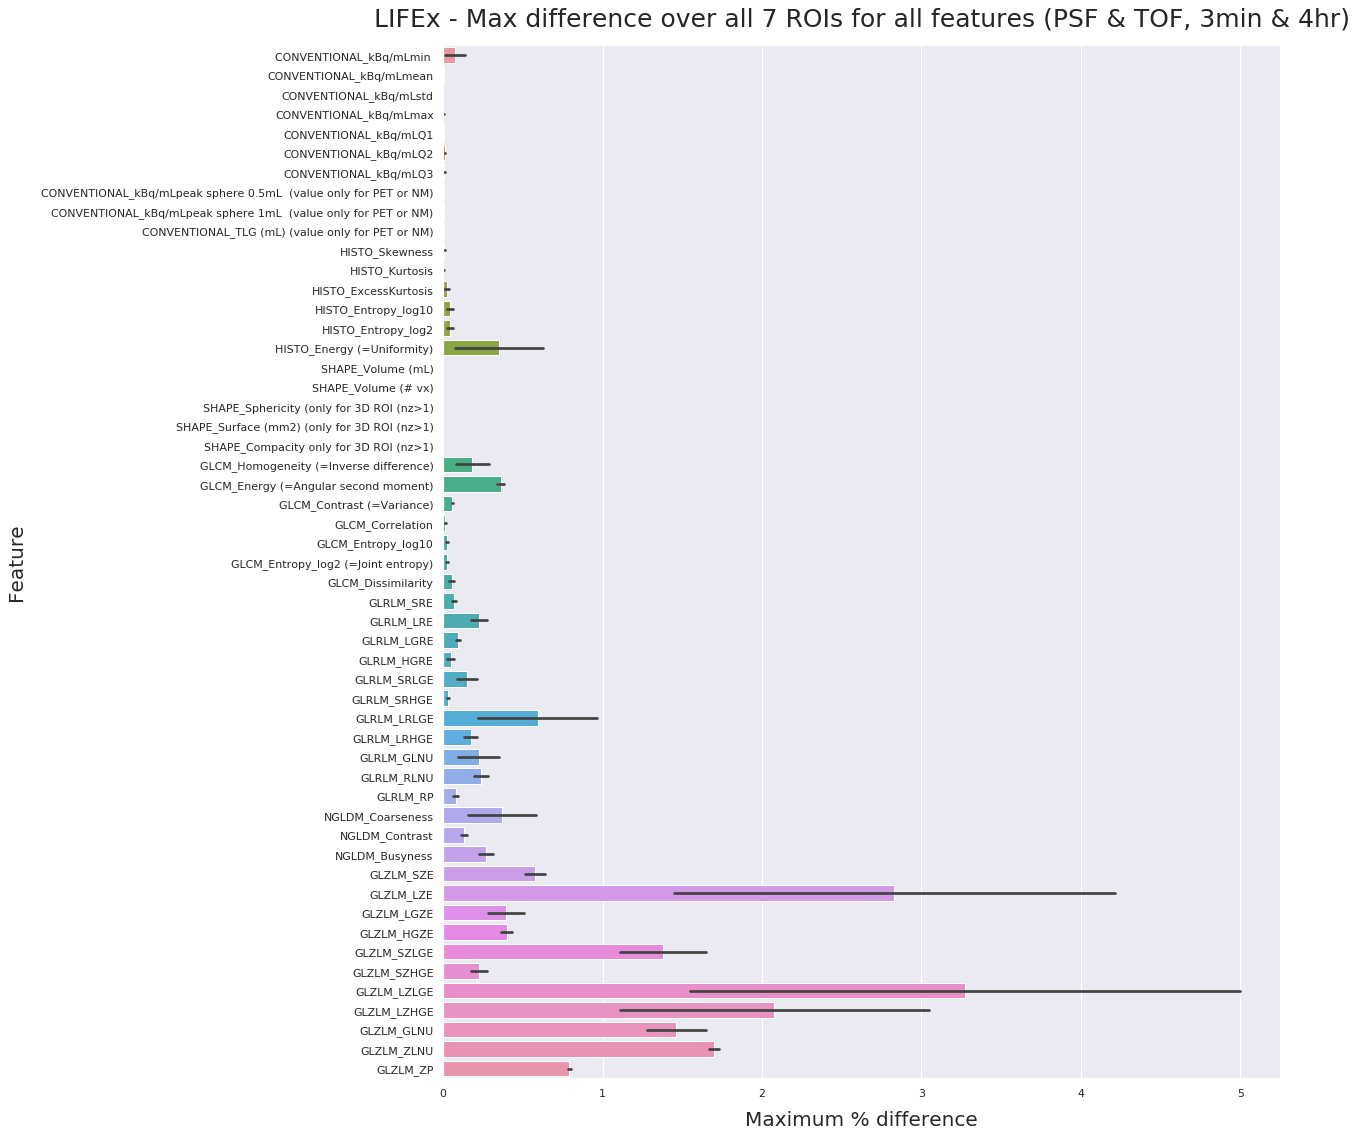

In [3]:
fig = plt.figure(figsize=(15,19))
ax = fig.add_subplot(1, 1, 1)
#sns.factorplot(x="MaxDiff",y="Titles",hue="ScanLength",data=diffplotDF,kind="bar")
sns.barplot(x="MaxDiff",y="Titles",data=diffplotDF)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("LIFEx - Max difference over all 7 ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot.png",format='png', bbox_inches = "tight")
plt.show()   # Uncomment this to show the data!
plt.close()

### We have the data from LIFEx - but this could be further verified by comparison with another radiomics-based software.

Pyradiomics can be installed using 
```python
pip install pyradiomics
```
The batch processing functionality is simple to use. The images are converted to Nifti (**.nii**) format using ImageJ, and the ROIs created in LIFEx are converted from .nii.gz to .nii using `gunzip` in the Linux terminal. 

**THE ROI .nii FILES MUST BE FLIPPED IN THE Z-AXIS AND MADE BINARY**

This was done using the ImageJ macro:
```c
for (i=1; i<=nSlices; i++) {
 setSlice(i);
 changeValues(v1,v2,v3); // Change the value of all pixels between v1 and v2 to v3
} 
```

The pyradiomics batch script is called using:
```bash
pyradiomics /path/to/batch/file.csv -o /path/to/results/file.csv -f csv --log-file /path/to/log/file.txt -v [1-5]
```
The batch file should be a csv with the headers "Image,Mask\n". Each mask (the prepared ROI .nii files) should have its own entry with each image.

Let's have a look at the data from the test extraction.

In [4]:
lf_pyrad = lf.drop([14,16],axis=0)
lfpyradorder = [x.split("/")[1] for x in lf_pyrad.Filepath.tolist()]


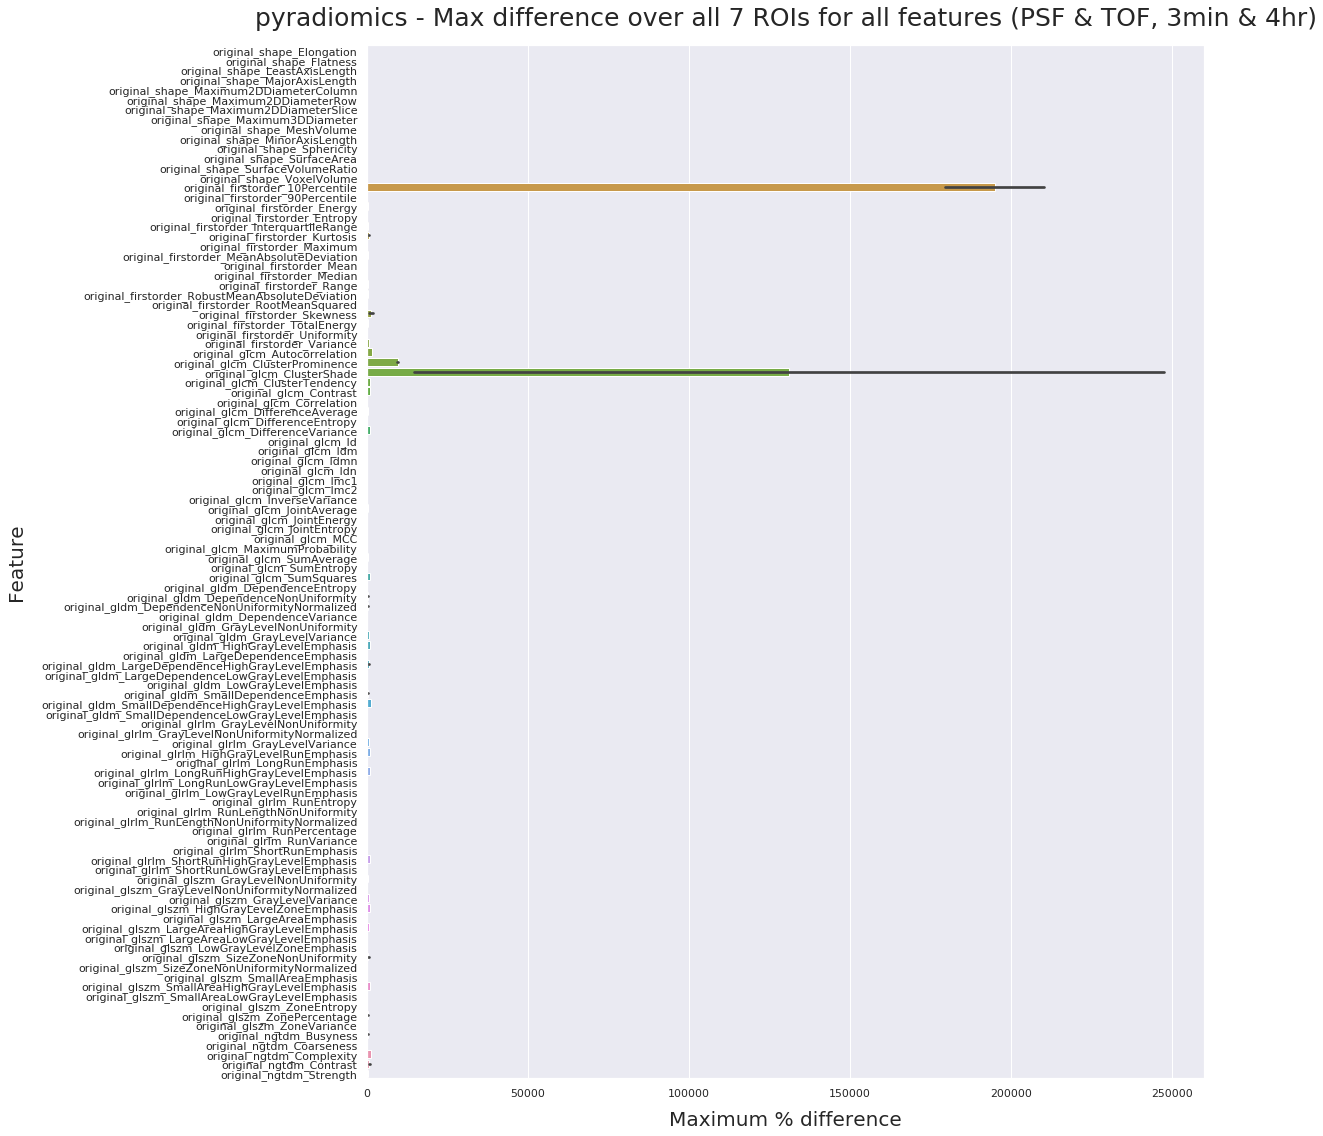

In [5]:
pyrad_results_fromfile = pd.read_csv("/home/gn/data/pyradiomics_test/results.csv")
patient_dict = {
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-00-OP_000_000_ctm.v-DICOM.nii" : 2,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-00-PSF_000_000_ctm.v-DICOM.nii" : 11,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-00-PSFTOF_000_000_ctm.v-DICOM.nii" : 5,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-01-OP_000_000_ctm.v-DICOM.nii" : 10,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-01-PSF_000_000_ctm.v-DICOM.nii" : 9,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v-DICOM.nii" : 0,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-LM-00-OP_000_000_ctm.v-DICOM.nii" : 6,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-LM-00-PSF_000_000_ctm.v-DICOM.nii" : 3,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-LM-00-PSFTOF_000_000_ctm.v-DICOM.nii" : 1,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-WB-OP_000_000_ctm.v-DICOM.nii" : 4,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-WB-PSF_000_000_ctm.v-DICOM.nii" : 7,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-WB-PSFTOF_000_000_ctm.v-DICOM.nii" : 8,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/scannernii/#9_Iterative+ToF_2-21_256z1-1_5mm.nii" : 13,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/scannernii/#10_4hrs_Iterative+ToF_2-21_256z1-1_5mm.nii" : 15,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/scannernii/#11_Iterative+ToF+PSF_2-21_256z1-1_5mm.nii" : 14,
    "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/scannernii/#12_4hrs_Iterative+ToF+PSF_2-21_256z1-1_5mm.nii" : 12
}

p_3m_e7 = "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-00-PSFTOF_000_000_ctm.v-DICOM.nii"
p_4h_e7 = "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/e7nii/GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v-DICOM.nii"
p_3m_s  = "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/scannernii/#11_Iterative+ToF+PSF_2-21_256z1-1_5mm.nii"
p_4h_s  = "/home/gn/SCANNER_DATA/GeNEMA_2Oct19/scannernii/#12_4hrs_Iterative+ToF+PSF_2-21_256z1-1_5mm.nii"
roi_list = ["BG","C1","C2","C3","C4","C5","C6"]

# Copied from StackOverflow - separate massive pyradiomics dataset into a "dflist" so I can use get_xydata
UniqueNames = pyrad_results_fromfile.Image.unique()
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
for key in DataFrameDict.keys():
    DataFrameDict[key] = pyrad_results_fromfile[:][pyrad_results_fromfile.Image == key]
    
dataframelist = []
for ss in lfpyradorder:
    for elem in DataFrameDict:
        if ss in DataFrameDict[elem].Image.unique()[0]:
            dataframelist.append(DataFrameDict[elem])
            
dropcols = [x for x in pyrad_results_fromfile.columns if x.split("_")[0] not in ["Image","Mask","original"]]
# dropcols.append("original_firstorder_10Percentile")
# dropcols.append("original_glcm_ClusterShade")
# dropcols.append("original_glszm_LargeAreaHighGrayLevelEmphasis")

for dfi in dataframelist:
    dfi.drop(dropcols,axis=1,inplace=True)
    
# This step is needed because there's a 0 in the column of one of the 4h scanner-recon ROI "Minimum"
# This is far from ideal - the Minimum is one of the key metrics to determine differences between the
# two reconstruction modalities
for dfi in dataframelist: 
    dfi.drop("original_firstorder_Minimum",axis=1,inplace=True) 

pyrad_3m_x,pyrad_3m_y = get_xydata(lf,dataframelist,include_all_valid=False,scan_length=3.)
pyrad_4h_x,pyrad_4h_y = get_xydata(lf,dataframelist,include_all_valid=False,scan_length=240.)

pyrad_diffplotDF = pd.DataFrame(data={"Titles":pyrad_3m_y+pyrad_3m_y,"MaxDiff":pyrad_3m_x+pyrad_4h_x })
fig = plt.figure(figsize=(15,19))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="MaxDiff",y="Titles",data=pyrad_diffplotDF)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("pyradiomics - Max difference over all 7 ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot_pyrad.png",format='png', bbox_inches = "tight")
plt.show()   # Uncomment this to show the data!
plt.close()

### Wow. Some of these (~10<sup>5</sup>) are clearly much too large
    
To remedy, fix the bin sizes in custom pyradiomics extraction. This was done using the `-p` flag to include the parameter file `pyradiomics_batch_settings.yaml`, which contains:    
```yaml
# We only want the extraction to be performed on the original image
imageType:
    Original: {}
 # Set bins to the same size as those in the LIFEx extraction
setting:
    binWidth: 250
    binCount: 100
```
It should be noted that this considerably sped up the extraction process (also reducing the number of images involved.
The results are saved in the `results_2.csv` file.

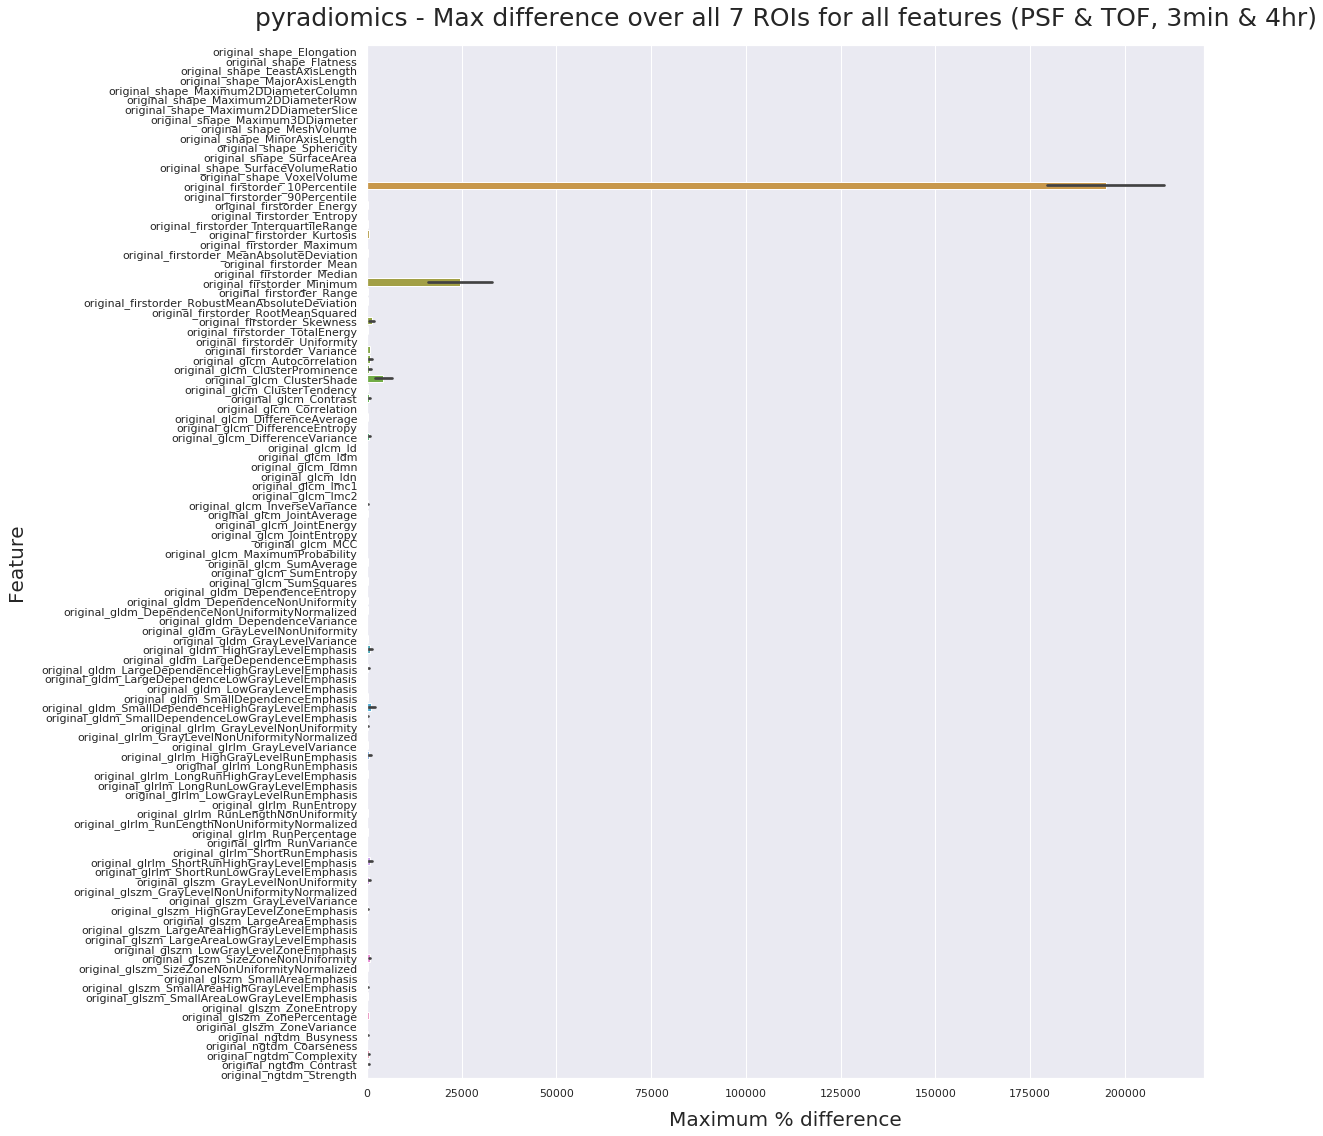

In [6]:
pyrad_results_fromfile = pd.read_csv("/home/gn/data/pyradiomics_test/results_2.csv")

UniqueNames = pyrad_results_fromfile.Image.unique()
#print(UniqueNames)
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
for key in DataFrameDict.keys():
    DataFrameDict[key] = pyrad_results_fromfile[:][pyrad_results_fromfile.Image == key]
dataframelist = []

for ss in lfpyradorder:
    for elem in DataFrameDict:
        if ss in DataFrameDict[elem].Image.unique()[0]:
            dataframelist.append(DataFrameDict[elem])
            
#print(dataframelist)
dropcols = [x for x in pyrad_results_fromfile.columns if x.split("_")[0] not in ["Image","Mask","original"]]
#print([x.Image.unique() for x in dataframelist])

#dropcols.append("original_firstorder_10Percentile")

for dfi in dataframelist:
    dfi.drop(dropcols,axis=1,inplace=True)
# for dfi in dataframelist: 
#     dfi.drop("original_firstorder_Minimum",axis=1,inplace=True) 

pyrad_3m_x,pyrad_3m_y = get_xydata(lf_pyrad,dataframelist,include_all_valid=False,scan_length=3.)
pyrad_4h_x,pyrad_4h_y = get_xydata(lf_pyrad,dataframelist,include_all_valid=False,scan_length=240.)


pyrad_diffplotDF = pd.DataFrame(data={"Titles":pyrad_3m_y+pyrad_3m_y,"MaxDiff":pyrad_3m_x+pyrad_4h_x })
fig = plt.figure(figsize=(15,19))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="MaxDiff",y="Titles",data=pyrad_diffplotDF)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("pyradiomics - Max difference over all 7 ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot_pyrad_2.png",format='png', bbox_inches = "tight")
plt.show() 
plt.close()

### Maybe this could be related to the method of data calculation?

At present, the maximum difference is calculated, for each feature value $X$ using $$100 \times\frac{X_{scanner} - X_{e7}}{X_{scanner}}$$

But what if these values of $X_{scanner}$ are so close to zero that it is artificially inflating our "maxdiff" calculation? My thoughts are that an ROI has captured a region of 0 kBq/ml. 

Consequently in my `get_xydata` function (see `e7_validation_functions.py`) I included *calcMethodB*: $$100 \times\frac{X_{scanner} - X_{e7}}{\frac{1}{2}\times \left( X_{scanner} + X_{e7} \right)}$$ or $$200 \times\frac{X_{scanner} - X_{e7}}{X_{scanner} + X_{e7} }$$

In other words, calculating the maximum difference with respect to the average as opposed to using $X_{scanner}$ values as a reference. 

Implementing this, we get the below results.

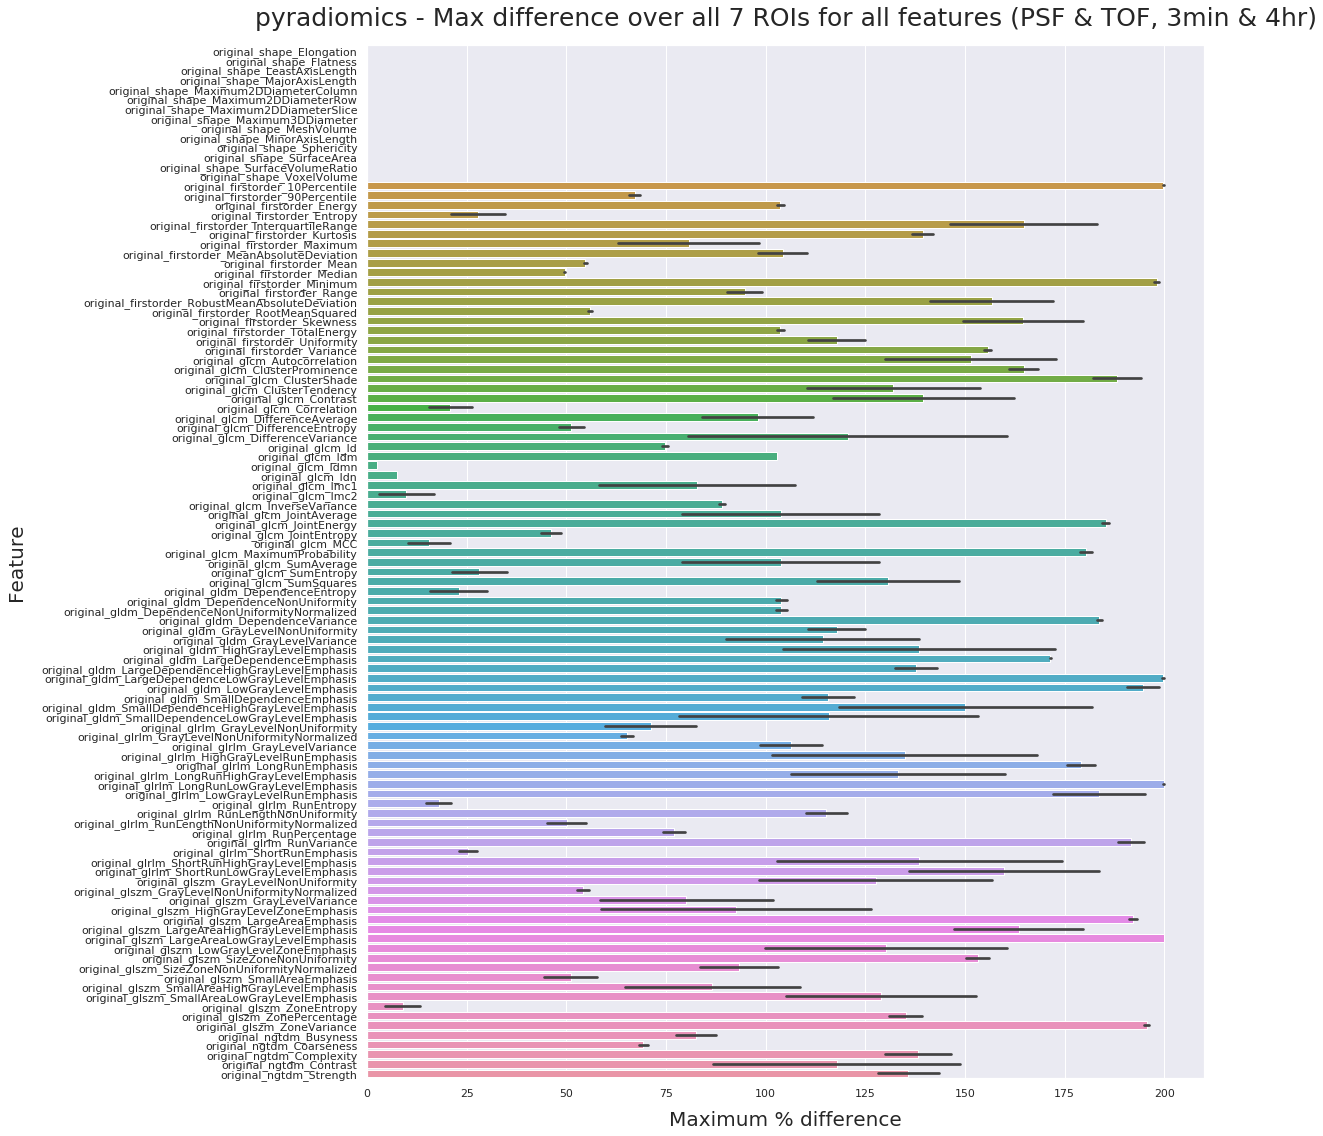

In [7]:

pyrad_3m_x,pyrad_3m_y = get_xydata(lf_pyrad,dataframelist,include_all_valid=False,scan_length=3.,calc_method="B")
pyrad_4h_x,pyrad_4h_y = get_xydata(lf_pyrad,dataframelist,include_all_valid=False,scan_length=240.,calc_method="B")


pyrad_diffplotDF = pd.DataFrame(data={"Titles":pyrad_3m_y+pyrad_3m_y,"MaxDiff":pyrad_3m_x+pyrad_4h_x })
fig = plt.figure(figsize=(15,19))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="MaxDiff",y="Titles",data=pyrad_diffplotDF)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("pyradiomics - Max difference over all 7 ROIs for all features (PSF & TOF, 3min & 4hr)",fontsize=25,pad=20)
plt.savefig("maxdiffplot_pyrad_2.png",format='png', bbox_inches = "tight")
plt.show() 
plt.close()

### Let's examine each individual ROI.

It's possible that these large values emanate from a poorly defined ROI for pyradiomics.

This was done by the inclusion of the *regions* kwarg in `get_xydata`. 

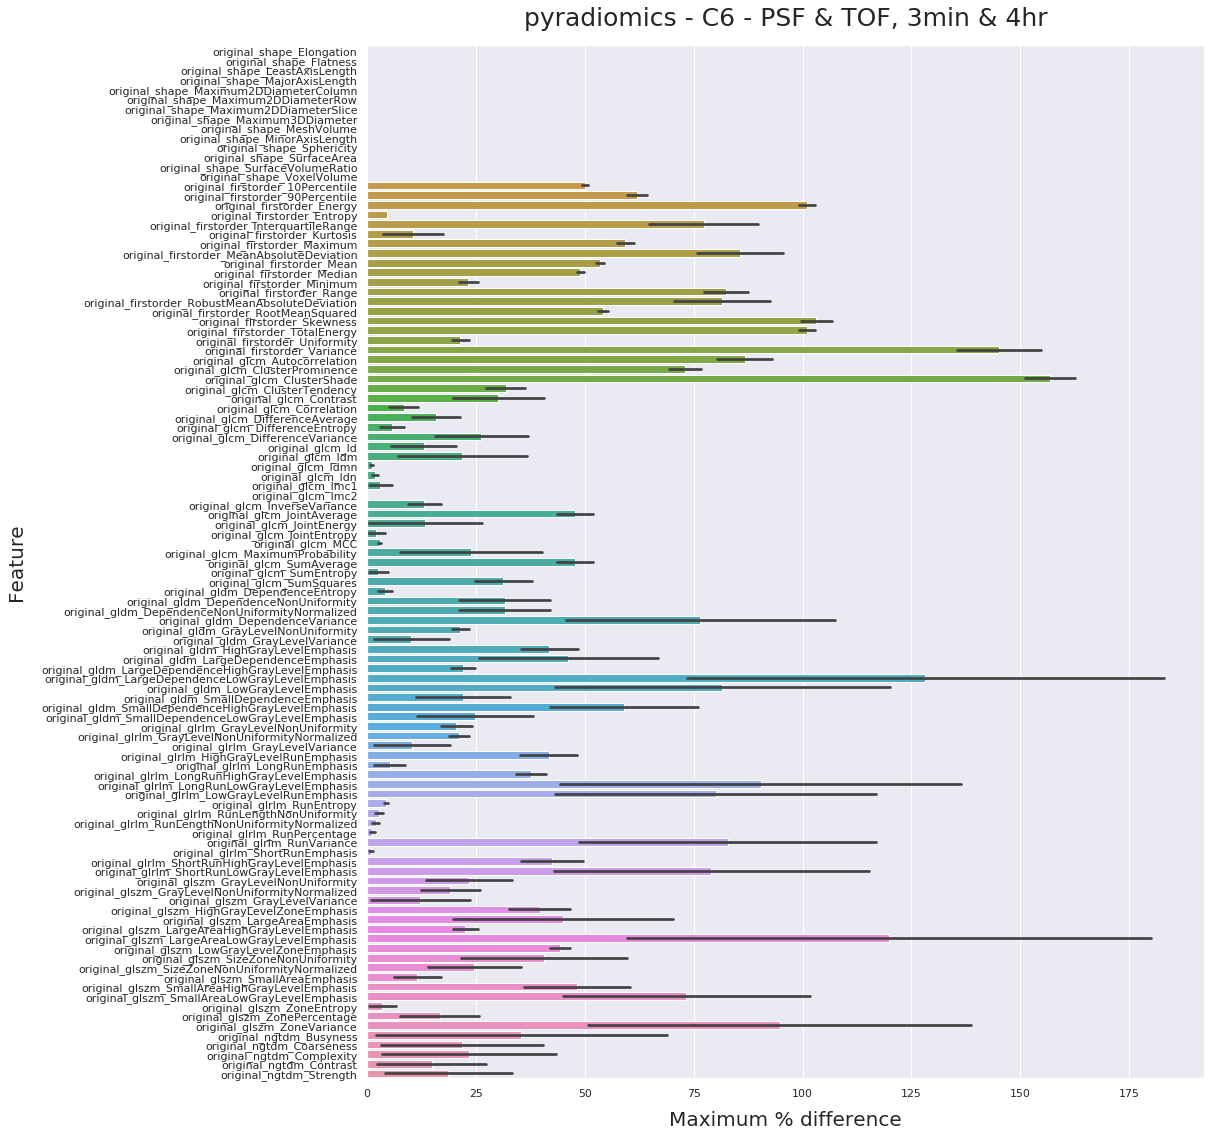

In [22]:
r = "C6"

pyrad_3m_x,pyrad_3m_y = get_xydata(lf_pyrad,dataframelist,include_all_valid=False,scan_length=3.,calc_method="B",regions=r)
pyrad_4h_x,pyrad_4h_y = get_xydata(lf_pyrad,dataframelist,include_all_valid=False,scan_length=240.,calc_method="B",regions=r)


pyrad_diffplotDF = pd.DataFrame(data={"Titles":pyrad_3m_y+pyrad_3m_y,"MaxDiff":pyrad_3m_x+pyrad_4h_x })
fig = plt.figure(figsize=(15,19))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="MaxDiff",y="Titles",data=pyrad_diffplotDF)
plt.ylabel("Feature", fontsize=20,labelpad=15)
plt.xlabel("Maximum % difference",fontsize=20,labelpad=12)
plt.title("pyradiomics - {} - PSF & TOF, 3min & 4hr".format(r),fontsize=25,pad=20)
plt.savefig("maxdiffplot_pyrad_2_{}.png".format(r),format='png', bbox_inches = "tight")
plt.show() 
plt.close()

# This isn't going anywhere for now.

## Let's see how similar metrics for each software directly compare.

In [23]:
lifex_pyrad_dict = {
    "CONVENTIONAL_kBq/mLmin":"original_firstorder_Minimum",
    "CONVENTIONAL_kBq/mLmean":"original_firstorder_Mean",
    "CONVENTIONAL_kBq/mLstd":"original_firstorder_Variance",  # Note - will have to square-root this column!
    "CONVENTIONAL_kBq/mLmax":"original_firstorder_Maximum",
    "HISTO_Skewness":"original_firstorder_Skewness",
    "HISTO_Kurtosis":"original_firstorder_Kurtosis",
    "HISTO_Entropy_log2":"original_firstorder_Entropy",
    "HISTO_Energy":"original_firstorder_Energy"
}

lifex_featlist = [key for key in lifex_pyrad_dict]
pyrad_featlist = [lifex_pyrad_dict[key] for key in lifex_pyrad_dict]

print(dl)

[        INFO_PatientName INFO_PatientID     INFO_ProcessDateOfTexture  \
0  Ge-68_NEMA-IQ PHANTOM       1289-232  Fri Oct 18 14:18:21 BST 2019   
1  Ge-68_NEMA-IQ PHANTOM       1289-232  Fri Oct 18 14:18:21 BST 2019   
2  Ge-68_NEMA-IQ PHANTOM       1289-232  Fri Oct 18 14:18:21 BST 2019   
3  Ge-68_NEMA-IQ PHANTOM       1289-232  Fri Oct 18 14:18:21 BST 2019   
4  Ge-68_NEMA-IQ PHANTOM       1289-232  Fri Oct 18 14:18:21 BST 2019   
5  Ge-68_NEMA-IQ PHANTOM       1289-232  Fri Oct 18 14:18:21 BST 2019   
6  Ge-68_NEMA-IQ PHANTOM       1289-232  Fri Oct 18 14:18:21 BST 2019   

  INFO_SeriesDate                                        INFO_Series  \
0      2019-10-02  101001_GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v ...   
1      2019-10-02  101001_GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v ...   
2      2019-10-02  101001_GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v ...   
3      2019-10-02  101001_GeNEMA_jsr_256-01-PSFTOF_000_000_ctm.v ...   
4      2019-10-02  101001_GeNEMA_jsr_256-01-PSFTOF_000